In [6]:
import numpy as np
import pandas as pd

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

def standardize(xs):
        return (xs - xs.mean()) / xs.std()

grouped_data = example_df.groupby('even')
print example_df
print grouped_data.groups
print grouped_data.apply(standardize)
print grouped_data['value'].apply(standardize)

   above_three   even  value
a        False  False      1
b        False  False      3
c        False   True      2
d         True   True      4
e        False  False      1
f         True   True      6
g         True   True      4
{False: Index([u'a', u'b', u'e'], dtype='object'), True: Index([u'c', u'd', u'f', u'g'], dtype='object')}


   above_three  even     value
a          NaN   NaN -0.577350
b          NaN   NaN  1.154701
c         -1.5   NaN -1.224745
d          0.5   NaN  0.000000
e          NaN   NaN -0.577350
f          0.5   NaN  1.224745
g          0.5   NaN  0.000000
a   -0.577350
b    1.154701
c   -1.224745
d    0.000000
e   -0.577350
f    1.224745
g    0.000000
Name: value, dtype: float64


In [9]:
def second_largest(xs):
        sorted_xs = xs.sort(inplace=False, ascending=False)
        return sorted_xs.iloc[1]
grouped_data = example_df.groupby('even')

print grouped_data['value'].apply(second_largest)

AttributeError: ("'Series' object has no attribute 'sort'", u'occurred at index above_three')

In [44]:
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})
print ridership_df.groupby('UNIT')['ENTRIESn','EXITSn'].apply(get_hourly_entries_and_exits)
print ridership_df['ENTRIESn','EXITSn'].apply(get_hourly_entries_and_exits)
# print ridership_df['ENTRIESn','EXITSn'].apply(get_hourly_entries_and_exits)

def get_hourly_entries_and_exits(entries_and_exits):
    return entries_and_exits.diff() 
    # return  entries_and_exits - entries_and_exits.shift() 



# grouped_data = new_df.groupby('UNIT')
# print grouped_data
# grouped_data = ridership_df.groupby('UNIT','')

# def get_hourly_entries_and_exits(entries_and_exits):
    

   ENTRIESn  EXITSn
0       NaN     NaN
1       NaN     NaN
2      23.0     8.0
3      14.0     8.0
4      18.0    18.0
5      29.0   205.0
6      71.0    54.0
7     132.0   593.0
8     170.0    44.0


KeyError: ('ENTRIESn', 'EXITSn')

In [49]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

# print subway_df
# print weather_df


def combine_dfs(subway_df, weather_df):
    return subway_df.merge(weather_df,on=['DATEn','hour','latitude','longitude'],how='inner')
    
print combine_dfs(subway_df,weather_df)

      DATEn  ENTRIESn    EXITSn  UNIT  hour   latitude  longitude  fog  \
0  05-01-11   4388333   2911002  R003     0  40.689945 -73.872564    0   
1  05-02-11   4388348   2911036  R003     0  40.689945 -73.872564    0   
2  05-03-11   4389885   2912127  R003     0  40.689945 -73.872564    0   
3  05-04-11   4391507   2913223  R003     0  40.689945 -73.872564    0   
4  05-05-11   4393043   2914284  R003     0  40.689945 -73.872564    0   
5  05-01-11  14656120  14451774  R004     0  40.691320 -73.867135    0   
6  05-02-11  14656174  14451851  R004     0  40.691320 -73.867135    0   
7  05-03-11  14660126  14454734  R004     0  40.691320 -73.867135    0   
8  05-04-11  14664247  14457780  R004     0  40.691320 -73.867135    0   
9  05-05-11  14668301  14460818  R004     0  40.691320 -73.867135    0   

   pressurei  rain  tempi  wspdi  
0      30.24     0   52.0    8.1  
1      30.32     0   48.9    6.9  
2      30.14     0   54.0    3.5  
3      29.98     0   57.2   15.0  
4      30.

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# first_even = example_df.groupby('even').first()
# print first_even
# print first_even['even']

first_even = example_df.groupby('even', as_index=False).first()
# print first_even
print first_even['even'] # Now 'even' is still a column in the DataFrame

0    False
1     True
Name: even, dtype: bool


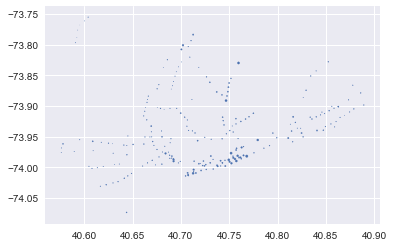

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
subway_df = pd.read_csv('nyc-subway-weather.csv')
data = subway_df.groupby(['latitude','longitude'],as_index=False).mean()
data.head()
scaled = data['ENTRIESn_hourly']/data['ENTRIESn_hourly'].std()
plt.scatter(data['latitude'],data['longitude'],s=scaled)
# subway_df.plot()
plt.show()

In [ ]:
countries = np.array([
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
    'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina'
])


employment = np.array([
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076
])

female_completion = np.array([
    97.35583,  104.62379,  103.02998,   95.14321,  103.69019,
    98.49185,  100.88828,   95.43974,   92.11484,   91.54804,
    95.98029,   98.22902,   96.12179,  119.28105,   97.84627,
    29.07386,   38.41644,   90.70509,   51.7478 ,   95.45072
])

male_completion = np.array([
     95.47622,  100.66476,   99.7926 ,   91.48936,  103.22096,
     97.80458,  103.81398,   88.11736,   93.55611,   87.76347,
    102.45714,   98.73953,   92.22388,  115.3892 ,   98.70502,
     37.00692,   45.39401,   91.22084,   62.42028,   90.66958
])

print countries.dtype
print employment.dtype

print employment.mean()
print employment.max()
print employment.min()
print employment.std()
# for country in countries:
#     print 'Examing country {}'.format(country)

# for i in range(len(countries)):
#     country = countries[i]
#     country_employment = employment[i]
#     print 'Country {} has employment {}'.format(country,country_employment)

def max_employment(countries, employment):

    max_country = None     
    max_value = 0   
    for i in range(len(countries)):
        if employment[i] > max_value:
            max_value = employment[i]
            max_country = countries[i]
    return (max_country, max_value)

# print max_employment(countries,employment)
# print employment.max()
# print countries[employment.argmax()]

a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])
    
# print a > b
# print a >= b
# print a < b
# print a <= b
# print a == b
# print a != b
# print a > 2

def overall_completion_rate(female_completion, male_completion):
    '''
    Fill in this function to return a NumPy array containing the overall
    school completion rate for each country. The arguments are NumPy
    arrays giving the female and male completion of each country in
    the same order.
    '''
    overall_completion = (female_completion + male_completion)/2
    return overall_completion

print overall_completion_rate(female_completion,male_completion)
